In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import datetime as dt
import pickle
import os

In [2]:
# load data, reformat index to location, change column names to datetime
dfc = pd.read_pickle('cleaned_data/confirmed.pkl')
dfc["Location"] = dfc.apply(lambda row: row["Province/State"] + ":" + row["Country/Region"], axis=1)
dfc.set_index('Location', inplace=True)
dfc.drop(columns=['Province/State', 'Country/Region'], inplace=True)
dfc.columns = pd.to_datetime(dfc.columns)

dfc.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08
Location,,,,,,,,,,,,,,,,,,,,,
Alabama:US,0,0,0,0,0,0,0,0,0,0,...,6912,7088,7294,7611,7888,8112,8437,8691,9046,9385
Alaska:US,0,0,0,0,0,0,0,0,0,0,...,355,355,364,365,368,370,371,372,374,377
American Samoa:US,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona:US,0,0,0,0,1,1,1,1,1,1,...,7209,7655,7969,8364,8640,8924,9305,9707,9945,10526
Arkansas:US,0,0,0,0,0,0,0,0,0,0,...,3193,3281,3337,3372,3437,3491,3525,3611,3703,3747


In [3]:
dfd = pd.read_pickle('cleaned_data/deaths.pkl')
dfd["Location"] = dfd.apply(lambda row: row["Province/State"] + ":" + row["Country/Region"], axis=1)
dfd.set_index('Location', inplace=True)
dfd.drop(columns=['Province/State', 'Country/Region'], inplace=True)
dfd.columns = pd.to_datetime(dfd.columns)

dfd.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08
Location,,,,,,,,,,,,,,,,,,,,,
Alabama:US,0,0,0,0,0,0,0,0,0,0,...,256,272,289,288,290,298,315,343,369,383
Alaska:US,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,10,10,10
American Samoa:US,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona:US,0,0,0,0,0,0,0,0,0,0,...,308,320,330,330,362,362,395,426,450,517
Arkansas:US,0,0,0,0,0,0,0,0,0,0,...,57,61,64,72,76,80,83,87,87,88


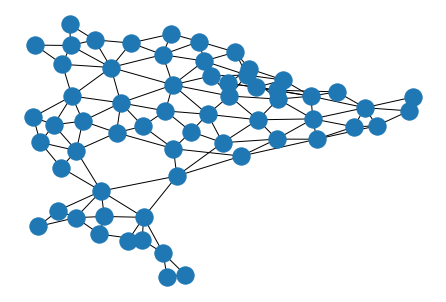

62


In [4]:
# create base graph
C = nx.Graph()
# All canadian + us border connections
# State and country colon-separated
C.add_edges_from([("Quebec:Canada", "Ontario:Canada"),
                  ("Quebec:Canada", "Newfoundland and Labrador:Canada"),
                  ("Quebec:Canada", "New Brunswick:Canada"),
                  ("Quebec:Canada", "Maine:US"),
                  ("Quebec:Canada", "Vermont:US"),
                  ("Quebec:Canada", "New York:US"),
                  ("New Brunswick:Canada", "Nova Scotia:Canada"),
                  ("New Brunswick:Canada", "Maine:US"),
                  ("Prince Edward Island:Canada", "Nova Scotia:Canada"),
                  ("Prince Edward Island:Canada", "New Brunswick:Canada"),
                  ("Manitoba:Canada", "Michigan:US"),
                  ("Manitoba:Canada", "North Dakota:US"),
                  ("Saskatchewan:Canada", "Manitoba:Canada"),
                  ("Saskatchewan:Canada", "Alberta:Canada"),
                  ("Saskatchewan:Canada", "Northwest Territories:Canada"),
                  ("Saskatchewan:Canada", "Montana:US"),
                  ("Saskatchewan:Canada", "North Dakota:US"),
                  ("Ontario:Canada", "Manitoba:Canada"),
                  ("Ontario:Canada", "New York:US"),
                  ("Ontario:Canada", "Michigan:US"),
                  ("Ontario:Canada", "Minnesota:US"),
                  ("Alberta:Canada", "Montana:US"),
                  ("Alberta:Canada", "British Columbia:Canada"),
                  ("Alberta:Canada", "Northwest Territories:Canada"),
                  ("British Columbia:Canada", "Washington:US"),
                  ("British Columbia:Canada", "Montana:US"),
                  ("British Columbia:Canada", "Idaho:US"),
                  ("British Columbia:Canada", "Yukon:Canada"),
                  ("British Columbia:Canada", "Alaska:US"),
                  ("British Columbia:Canada", "Northwest Territories:Canada"),
                  ("Northwest Territories:Canada", "Yukon:Canada"),
                  ("Yukon:Canada", "Alaska:US"),
                  ("Washington:US", "Idaho:US"),
                  ("Washington:US", "Oregon:US"),
                  ("Oregon:US", "California:US"),
                  ("Oregon:US", "Idaho:US"),
                  ("Oregon:US", "Nevada:US"),
                  ("California:US", "Nevada:US"),
                  ("California:US", "Arizona:US"),
                  ("Nevada:US", "Idaho:US"),
                  ("Nevada:US", "Utah:US"),
                  ("Nevada:US", "Arizona:US"),
                  ("Idaho:US", "Montana:US"),
                  ("Idaho:US", "Utah:US"),
                  ("Idaho:US", "Wyoming:US"),
                  ("Utah:US", "Arizona:US"),
                  ("Utah:US", "Colorado:US"),
                  ("Utah:US", "Wyoming:US"),
                  ("Arizona:US", "New Mexico:US"),
                  ("Montana:US", "North Dakota:US"),
                  ("Montana:US", "South Dakota:US"),
                  ("Montana:US", "Wyoming:US"),
                  ("Wyoming:US", "South Dakota:US"),
                  ("Wyoming:US", "Nebraska:US"),
                  ("Wyoming:US", "Colorado:US"),
                  ("Colorado:US", "Nebraska:US"),
                  ("Colorado:US", "Kansas:US"),
                  ("Colorado:US", "Oklahoma:US"),
                  ("Colorado:US", "New Mexico:US"),
                  ("New Mexico:US", "Oklahoma:US"),
                  ("New Mexico:US", "Texas:US"),
                  ("North Dakota:US", "Minnesota:US"),
                  ("North Dakota:US", "South Dakota:US"),
                  ("South Dakota:US", "Minnesota:US"),
                  ("South Dakota:US", "Iowa:US"),
                  ("South Dakota:US", "Nebraska:US"),
                  ("Nebraska:US", "Iowa:US"),
                  ("Nebraska:US", "Missouri:US"),
                  ("Nebraska:US", "Kansas:US"),
                  ("Kansas:US", "Missouri:US"),
                  ("Kansas:US", "Oklahoma:US"),
                  ("Oklahoma:US", "Missouri:US"),
                  ("Oklahoma:US", "Arkansas:US"),
                  ("Oklahoma:US", "Texas:US"),
                  ("Texas:US", "Arkansas:US"),
                  ("Texas:US", "Louisiana:US"),
                  ("Minnesota:US", "Wisconsin:US"),
                  ("Minnesota:US", "Iowa:US"),
                  ("Iowa:US", "Wisconsin:US"),
                  ("Iowa:US", "Illinois:US"),
                  ("Iowa:US", "Missouri:US"),
                  ("Missouri:US", "Illinois:US"),
                  ("Missouri:US", "Kentucky:US"),
                  ("Missouri:US", "Tennessee:US"),
                  ("Missouri:US", "Arkansas:US"),
                  ("Arkansas:US", "Tennessee:US"),
                  ("Arkansas:US", "Mississippi:US"),
                  ("Arkansas:US", "Louisiana:US"),
                  ("Louisiana:US", "Mississippi:US"),
                  ("Wisconsin:US", "Michigan:US"),
                  ("Wisconsin:US", "Illinois:US"),
                  ("Illinois:US", "Indiana:US"),
                  ("Illinois:US", "Kentucky:US"),
                  ("Mississippi:US", "Tennessee:US"),
                  ("Mississippi:US", "Alabama:US"),
                  ("Michigan:US", "Ohio:US"),
                  ("Michigan:US", "Indiana:US"),
                  ("Indiana:US", "Ohio:US"),
                  ("Indiana:US", "Kentucky:US"),
                  ("Kentucky:US", "Ohio:US"),
                  ("Kentucky:US", "West Virginia:US"),
                  ("Kentucky:US", "Virginia:US"),
                  ("Kentucky:US", "Tennessee:US"),
                  ("Tennessee:US", "Virginia:US"),
                  ("Tennessee:US", "North Carolina:US"),
                  ("Tennessee:US", "Georgia:US"),
                  ("Tennessee:US", "Alabama:US"),
                  ("Alabama:US", "Georgia:US"),
                  ("Alabama:US", "Florida:US"),
                  ("Ohio:US", "Pennsylvania:US"),
                  ("Ohio:US", "West Virginia:US"),
                  ("Georgia:US", "North Carolina:US"),
                  ("Georgia:US", "South Carolina:US"),
                  ("Georgia:US", "Florida:US"),
                  ("New York:US", "Vermont:US"),
                  ("New York:US", "Massachusetts:US"),
                  ("New York:US", "Connecticut:US"),
                  ("New York:US", "Pennsylvania:US"),
                  ("New York:US", "New Jersey:US"),
                  ("Pennsylvania:US", "New Jersey:US"),
                  ("Pennsylvania:US", "Delaware:US"),
                  ("Pennsylvania:US", "Maryland:US"),
                  ("Pennsylvania:US", "West Virginia:US"),
                  ("West Virginia:US", "Maryland:US"),
                  ("West Virginia:US", "Virginia:US"),
                  ("New Jersey:US", "Delaware:US"),
                  ("Delaware:US", "Maryland:US"),
                  ("Delaware:US", "District of Columbia:US"),
                  ("Maryland:US", "Virginia:US"),
                  ("Maryland:US", "West Virginia:US"),
                  ("Maryland:US", "District of Columbia:US"),
                  ("Virginia:US", "District of Columbia:US"),
                  ("Virginia:US", "North Carolina:US"),
                  ("North Carolina:US", "South Carolina:US"),
                  ("Vermont:US", "New Hampshire:US"),
                  ("Vermont:US", "Massachusetts:US"),
                  ("New Hampshire:US", "Maine:US"),
                  ("New Hampshire:US", "Massachusetts:US"),
                  ("Massachusetts:US", "Rhode Island:US"),
                  ("Massachusetts:US", "Connecticut:US"),
                  ("Connecticut:US", "Rhode Island:US")])

# "visualize" graph
nx.draw(C)
plt.show()
print(C.number_of_nodes())

In [5]:
# drop data for locations not in nodes
dfc = dfc[dfc.index.isin(C.nodes())]
dfd = dfd[dfd.index.isin(C.nodes())]

print(len(dfc))
dfc.head()

62


,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08
Location,,,,,,,,,,,,,,,,,,,,,
Alabama:US,0,0,0,0,0,0,0,0,0,0,...,6912,7088,7294,7611,7888,8112,8437,8691,9046,9385
Alaska:US,0,0,0,0,0,0,0,0,0,0,...,355,355,364,365,368,370,371,372,374,377
Arizona:US,0,0,0,0,1,1,1,1,1,1,...,7209,7655,7969,8364,8640,8924,9305,9707,9945,10526
Arkansas:US,0,0,0,0,0,0,0,0,0,0,...,3193,3281,3337,3372,3437,3491,3525,3611,3703,3747
California:US,0,0,0,0,2,2,2,2,2,3,...,48747,50130,52026,53347,54903,55884,58456,60616,62148,63779


In [6]:
# reorder data based on node order
# need sorted(C.nodes()) because DGL will reassign node ordering as such
dfc = dfc.loc[sorted(C.nodes())]
dfd = dfd.loc[sorted(C.nodes())]

dfc.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08
Location,,,,,,,,,,,,,,,,,,,,,
Alabama:US,0,0,0,0,0,0,0,0,0,0,...,6912,7088,7294,7611,7888,8112,8437,8691,9046,9385
Alaska:US,0,0,0,0,0,0,0,0,0,0,...,355,355,364,365,368,370,371,372,374,377
Alberta:Canada,0,0,0,0,0,0,0,0,0,0,...,5165,5355,5573,5670,5766,5836,5893,5963,6017,6098
Arizona:US,0,0,0,0,1,1,1,1,1,1,...,7209,7655,7969,8364,8640,8924,9305,9707,9945,10526
Arkansas:US,0,0,0,0,0,0,0,0,0,0,...,3193,3281,3337,3372,3437,3491,3525,3611,3703,3747


In [7]:
# normalize values to [0,1]
dfc = dfc / dfc.values.max(axis=1, keepdims=True)
dfd = dfd / dfd.values.max(axis=1, keepdims=True)
dfd.fillna(0.0, inplace=True) # yukon has 0 deaths

dfc.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08
Location,,,,,,,,,,,,,,,,,,,,,
Alabama:US,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.736494,0.755248,0.777198,0.810975,0.840490,0.864358,0.898988,0.926052,0.963879,1.0
Alaska:US,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.941645,0.941645,0.965517,0.968170,0.976127,0.981432,0.984085,0.986737,0.992042,1.0
Alberta:Canada,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.846999,0.878157,0.913906,0.929813,0.945556,0.957035,0.966382,0.977862,0.986717,1.0
Arizona:US,0.0,0.0,0.0,0.0,0.000095,0.000095,0.000095,0.000095,0.000095,0.000095,...,0.684876,0.727247,0.757078,0.794604,0.820825,0.847805,0.884002,0.922193,0.944803,1.0
Arkansas:US,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.852148,0.875634,0.890579,0.899920,0.917267,0.931679,0.940753,0.963704,0.988257,1.0


In [8]:
# make C a directed graph
C = C.to_directed()

In [9]:
n_lags = 10
start_date = min(dfc.columns) + dt.timedelta(days=n_lags) # first day we can use as response
end_date = max(dfc.columns) # last day of data

print(start_date)
print(end_date)

2020-02-01 00:00:00
2020-05-08 00:00:00


In [11]:
# iterate over days and create graph with lagged node labels for each day
for date in pd.date_range(start_date, end_date):
    # get data in lag period
    start_lag = date - dt.timedelta(days=n_lags)
    lag_dates = dfc.columns[(dfc.columns < date) & (dfc.columns >= start_lag)]
    
    print(dfc[lag_dates].shape)
    # create feature and response arrays
    confirmed = np.reshape(dfc[lag_dates].values, (-1, n_lags, 1))
    deaths = np.reshape(dfd[lag_dates].values, (-1, n_lags, 1))
    features = np.concatenate((confirmed, deaths), axis=2)
    targets = np.stack((dfc[date].values, dfd[date].values)).T
      
    print("############### Lag Dates : #####################################")    
    print(lag_dates)
    print("############### Confirmed Cases : #####################################")    
    print("Confirmed shape:{}".format(confirmed.shape))
    print(confirmed)
    print("############### Features Cases : #####################################")    
    print("Feature shape:{}".format(features.shape))
    print(features)
    print("############### Target Cases : #####################################")    
    print("Target shape:{}".format(targets.shape))
    print(targets)
    
    # save feature and response arrays with original graph
#     with open(f'model_ready_data/{str(date)[0:10]}.pkl', 'wb') as f:
#         pickle.dump((C, features, targets), f)

(62, 10)
############### Lag Dates : #####################################
DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31'],
              dtype='datetime64[ns]', freq=None)
############### Confirmed Cases : #####################################
Confirmed shape:(62, 10, 1)
[[[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]]

 [[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]]

 [[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]]

 [[0.00000000e